<a href="https://colab.research.google.com/github/Sachithananthan-1/Building_Linear_Regression_from_Scratch/blob/main/Building_Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class Linear_Regression():
  def __init__(self,learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):

    # No of training examples and no of features
    self.m, self.n = X.shape

    # Initiating weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # Implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # Calculate gradients
    dw = -(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db = -2*np.sum(self.Y-Y_prediction)/self.m

    # Updating the weights
    self.w = self.w-self.learning_rate*dw
    self.b = self.b-self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w) + self.b


### Implementing the above Linear Regression model for prediction

In [49]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [50]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [51]:
salary_data.shape

(30, 2)

In [52]:
# Checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [69]:
# Assigning feature and target values

X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [70]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [71]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [72]:
# Splitting data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [73]:
# Training Linear Regression model

model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 100)

In [74]:
model.fit(X_train,Y_train)

In [75]:
# printing the weight and bias values

print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  11020.0336420976
bias =  13149.999986510988


In [76]:
# Predict the salary value for the test data

test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 27476.04372124  25272.03699282  62740.15137595  53924.12446227
  91392.2388454   79270.2018391  103514.27585171  46210.1009128
  35190.06727071]


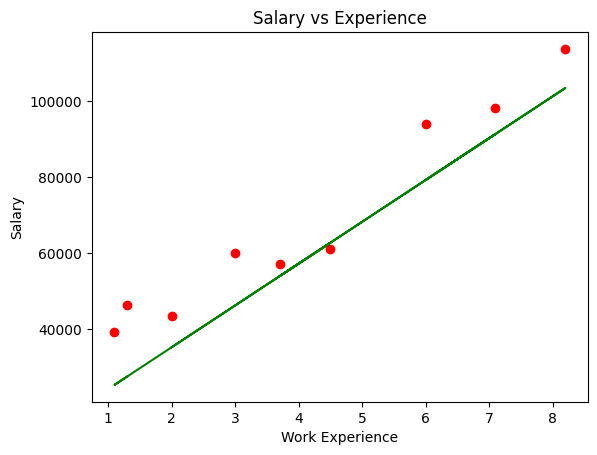

In [77]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='green')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()